#Testing Euler-Maruyama

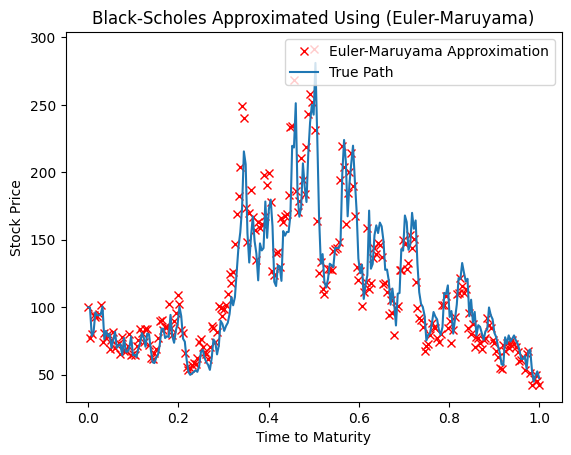

9.79946835779944


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100  # Initial stock price
sigma = 2  # Volatility
T = 1.0     # Time to maturity
N = 252     # Number of time steps
dt = T / N  # Time step
mu =1

def Black_Scholes(S0, mu, sigma, T, N):
    paths_approx = np.zeros((N+1, ))
    paths_true = np.zeros((N+1,))
    paths_approx[0] = S0
    paths_true[0] = S0
    running_wiener = 0
    for i in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))
        paths_approx[i] = paths_approx[i-1] + mu*paths_approx[i-1]*dt + sigma*paths_approx[i-1]*(dW)
        paths_true[i] = S0*np.exp((mu-0.5*sigma**2)*(i/N) +sigma*running_wiener)
        running_wiener+=dW
    return paths_approx, paths_true

# Simulate multiple paths
num_paths = 1
path_approx, path_true = Black_Scholes(S0, mu, sigma, T, N)
time_grid = np.linspace(0, T, N+1)
plt.plot(time_grid, path_approx, 'rx', label= 'Euler-Maruyama Approximation')
plt.plot(time_grid, path_true, label= 'True Path')

plt.title('Black-Scholes Approximated Using (Euler-Maruyama)')
plt.xlabel('Time to Maturity')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

absolute_errors = []
for i in range(len(path_true)):
  absolute_errors.append(np.abs(path_approx[i] - path_true[i]))

print(np.median(absolute_errors))

#Comparing Milstein and EM

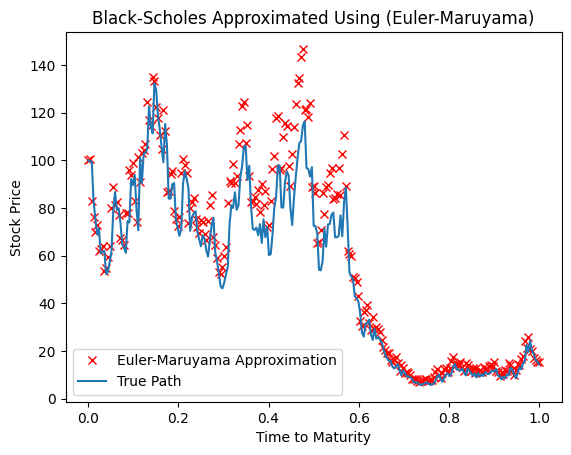

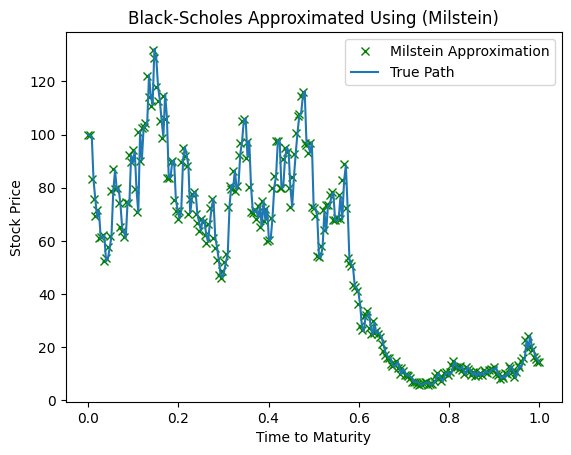

0.1299188065675827
0.07639534725786312


In [91]:
S0 = 100  # Initial stock price
sigma = 2  # Volatility
T = 1.0     # Time to maturity
N = 252     # Number of time steps
dt = T / N  # Time step
mu =1

def Black_Scholes_Compare(S0, mu, sigma, T, N):
    paths_EM = np.zeros((N+1, ))
    paths_Milstein = np.zeros((N+1, ))
    paths_true = np.zeros((N+1,))
    paths_EM[0] = S0
    paths_Milstein[0]=S0
    paths_true[0] = S0
    running_wiener = 0
    for i in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))
        paths_EM[i] = paths_EM[i-1] + mu*paths_EM[i-1]*dt + sigma*paths_EM[i-1]*(dW)
        paths_Milstein[i] = (paths_Milstein[i-1] + mu*paths_Milstein[i-1]*dt
                             + sigma*paths_Milstein[i-1]*(dW) + 0.5*(sigma**2)*paths_Milstein[i-1]*(dW**2 -dt))
        paths_true[i] = S0*np.exp((mu-0.5*sigma**2)*(i/N) +sigma*running_wiener)
        running_wiener+=dW
    return paths_EM, paths_Milstein, paths_true

# Simulate multiple paths
num_paths = 1
path_EM, path_Milstein, path_true = Black_Scholes_Compare(S0, mu, sigma, T, N)
time_grid = np.linspace(0, T, N+1)
plt.plot(time_grid, path_EM, 'rx', label= 'Euler-Maruyama Approximation')
plt.plot(time_grid, path_true, label= 'True Path')

plt.title('Black-Scholes Approximated Using (Euler-Maruyama)')
plt.xlabel('Time to Maturity')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.plot(time_grid, path_Milstein, 'gx', label= 'Milstein Approximation')
plt.plot(time_grid, path_true, label= 'True Path')

plt.title('Black-Scholes Approximated Using (Milstein)')
plt.xlabel('Time to Maturity')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

percent_errors_EM = []
percent_errors_Milstein = []
for i in range(len(path_true)):
  percent_errors_EM.append(np.abs((path_EM[i] - path_true[i])/path_EM[i]))
  percent_errors_Milstein.append(np.abs((path_Milstein[i] - path_true[i])/path_Milstein[i]))

print(np.median(percent_errors_EM))
print(np.median(percent_errors_Milstein))

#Compare Series of Different EM and Milstein Runs

In [96]:
l2_EM = []
MAPE_EM = []
l2_Milstein = []
MAPE_Milstein = []
for _ in range(500):
  path_EM, path_Milstein, path_true = Black_Scholes_Compare(S0, mu, sigma, T, N)
  l2_EM.append(np.linalg.norm(path_true -path_EM))
  l2_Milstein.append(np.linalg.norm(path_true -path_Milstein))
  MAPE_EM.append(np.mean(np.abs((path_EM - path_true) / path_EM)))
  MAPE_Milstein.append(np.mean(np.abs((path_Milstein - path_true) / path_Milstein)))

print('Median Euler-Maruyama $l_2$-norm:', np.median(l2_EM))
print('Median Euler-Maruyama MAPE:', np.median(MAPE_EM))
print('Median Milstein $l_2$-norm:', np.median(l2_Milstein))
print('Median Milstein MAPE:', np.median(MAPE_Milstein))

Median Euler-Maruyama $l_2$-norm: 231.13050831706315
Median Euler-Maruyama MAPE: 0.12838155157380188
Median Milstein $l_2$-norm: 187.04166595925477
Median Milstein MAPE: 0.10027689172328821
